{'01': 261, '11': 262, '00': 251, '10': 250}


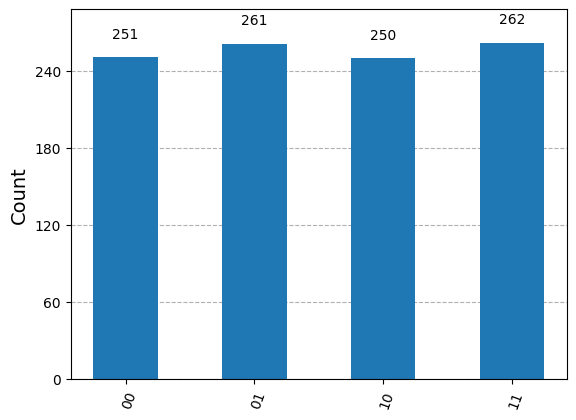

In [4]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
#from qiskit.providers.aer import AerSimulator

# Create a Quantum Circuit acting on a quantum register of three qubits
circuit = QuantumCircuit(3, 2)

# Step 1: Prepare the initial state (qubit 0) which Alice wants to teleport
# Suppose Alice wants to teleport the state |psi> = |1>
circuit.x(0)  # Apply X gate to change state from |0> to |1>
circuit.barrier()

# Step 2: Create the Bell pair between Alice's second qubit and Bob's qubit
circuit.h(1)  # Apply Hadamard gate to qubit 1
circuit.cx(1, 2)  # Apply CNOT gate with qubit 1 controlling qubit 2
circuit.barrier()

# Step 3: Alice applies the teleportation protocol
circuit.cx(0, 1)  # CNOT gate with qubit 0 controlling qubit 1
circuit.h(0)  # Hadamard gate on qubit 0
circuit.barrier()

# Step 4: Alice measures qubits 0 and 1
circuit.measure([0, 1], [0, 1])

# Step 5: Bob applies the correction gates based on the measurement results
circuit.cz(0, 2)  # Conditional Z gate if qubit 0 is measured as |1>
circuit.cx(1, 2)  # Conditional X gate if qubit 1 is measured as |1>

# Use Aer's simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

# Get the output probabilities
counts = result.get_counts(compiled_circuit)
print(counts)
plot_histogram(counts)


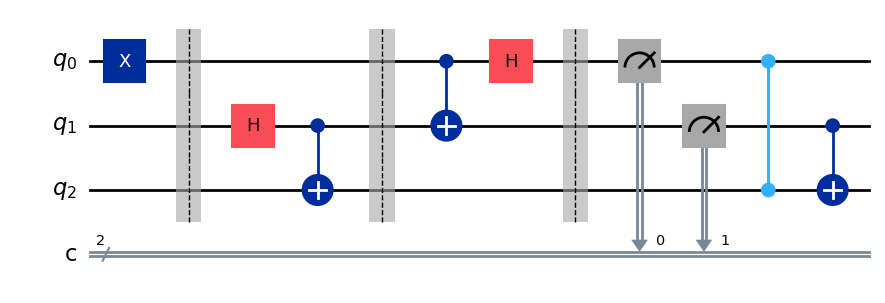

In [6]:
# Draw the circuit using Matplotlib to create a visual diagram
circuit_diagram = circuit.draw(output='mpl')
circuit_diagram  # This will display the circuit diagram inline automatically

Teleportation result with modified gates:
{'01': 259, '11': 258, '10': 244, '00': 263}


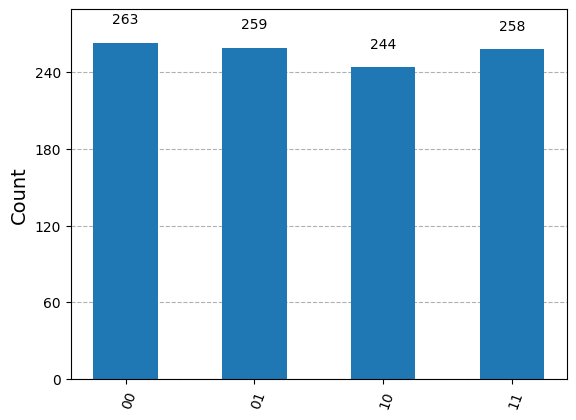

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Function to create a Bell pair with an alternative approach
def create_modified_bell_pair(qc, a, b):
    qc.h(a)
    qc.s(a)  # Apply S gate to introduce a phase
    qc.cx(a, b)

# Function to prepare the teleportation with an alternative measurement
def prepare_teleportation(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)
    qc.z(psi)  # Extra Z gate before measurement
    qc.x(psi)  # Extra X gate before measurement

# Function to apply alternative correction
def apply_correction(qc, a, b, creg1, creg2):
    qc.cz(a, b)  # Controlled-Z for phase correction
    qc.cx(a, b)  # This remains as a standard part of teleportation
    qc.y(b)  # Use Y gate instead of separate X and Z gates

# Create a quantum circuit with 3 qubits and 2 classical bits for measurement
qc = QuantumCircuit(3, 2)

# Assume psi is the qubit state Alice wants to teleport (qubit 0)
# Alice's part of the entangled pair (qubit 1), Bob's part (qubit 2)
# Initialize qubit 0 to |1> for teleportation
qc.x(0)  # This sets the initial state to teleport
qc.barrier()

# Create the entangled pair between Alice and Bob with a modified approach
create_modified_bell_pair(qc, 1, 2)
qc.barrier()

# Prepare for teleportation with an alternative measurement setup
prepare_teleportation(qc, 0, 1)
qc.barrier()

# Measure qubits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

# Apply alternative correction based on the classical bits
apply_correction(qc, 1, 2, 0, 1)

# Use Aer's simulator to run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit)
result = job.result()

# Get the output probabilities
counts = result.get_counts(qc)
print("Teleportation result with modified gates:")
print(counts)
plot_histogram(counts)

Job Status: job has successfully run


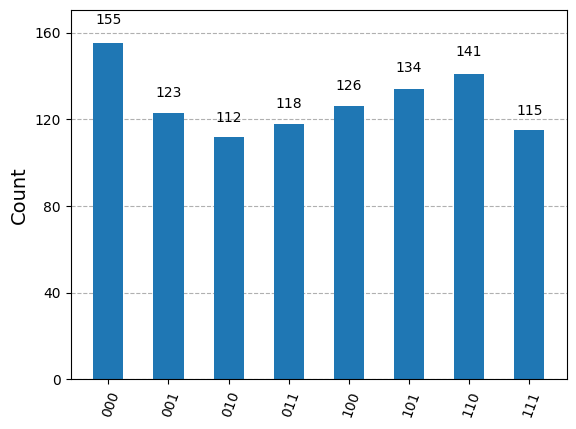

In [2]:
	import qiskit
	from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
	from qiskit_aer import Aer
	from qiskit.quantum_info import Statevector, state_fidelity
	from qiskit.visualization import plot_bloch_multivector
	from qiskit_ibm_provider.job import job_monitor
	from qiskit.visualization import plot_histogram
	import numpy as np
	
	# Create a quantum circuit with 3 qubits and 3 classical bits
	qc = QuantumCircuit(3, 3)
	
	# Initialize qubit [0] in the |+> state
	qc.h(0)
	
	# Entangle qubits [1] and [2]
	qc.h(1)
	qc.cx(1, 2)
	
	# Perform Bell-state measurement on qubits [0] and [1]
	qc.cx(0, 1)
	qc.h(0)
	qc.measure([0, 1], [0, 1])
	
	# Based on measurement results, apply corrections to qubit [2]
	# If outcome is `10', apply X gate to qubit [2]
	qc.x(2).c_if(qc.cregs[0], 2)
	# If outcome is `01', apply Z gate to qubit [2]
	qc.z(2).c_if(qc.cregs[0], 1)
	# If outcome is `11', apply both X and Z gates to qubit [2]
	qc.x(2).c_if(qc.cregs[0], 3)
	qc.z(2).c_if(qc.cregs[0], 3)
	
	# Measure qubit [2]
	qc.measure(2, 2)
	
	# Execute the circuit on the qasm simulator
	simulator = Aer.get_backend('qasm_simulator')
	transpiled_circuit = qiskit.transpile(qc, simulator)
	job = simulator.run(transpiled_circuit, shots=1024)
	job_monitor(job)
	result = job.result()
	
	# Get the measurement results
	counts = result.get_counts()
	
	# Plot the results
	plot_histogram(counts)	